In [2]:
import numpy as np

In [3]:
A = np.array([3,4])
B = np.array([2,4]) # A와 B 벡터 생성

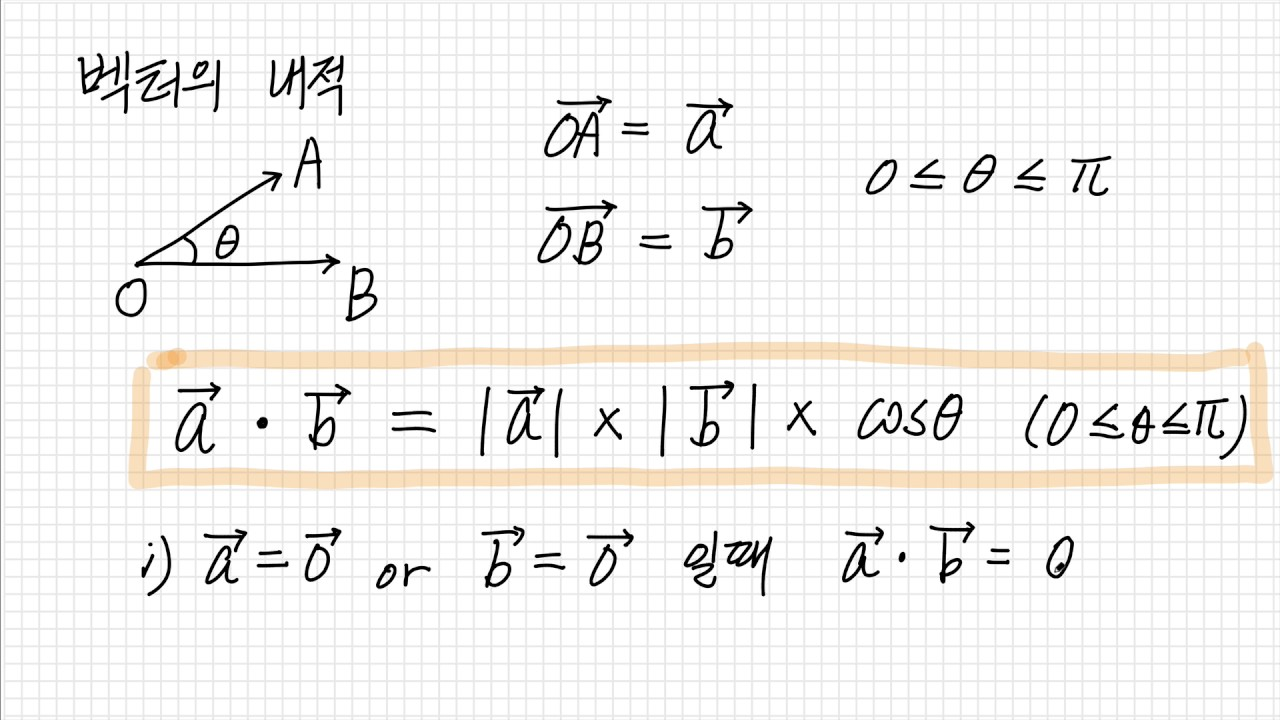

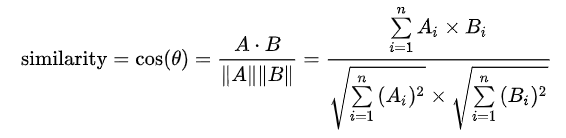

In [4]:
C = A.dot(B)   # A와 B 내적
C

22

In [9]:
A_norm = np.linalg.norm(A) #                      루트[(A)^2의 합]
B_norm = np.linalg.norm(B) #                      루트[(B)^2의 합]

# A,B내적 / (루트A^2합 X 루트B^2의 합)

In [6]:
Cos = C/(A_norm*B_norm)                         # 코사인 값 구하기
Cos

0.9838699100999074

# 결국 우리가 구해야 하는 것은 A와 B를 내적하여 Cos세타 값을 구해야 함

In [7]:
theta = np.arccos(Cos)                          # 쎄타 값 구하기
theta # rad 단위의 쎄타                         라디안 값이 나옴

0.17985349979247847

In [8]:
# rad 이해 안되면 deg로 바꿔서 계산         라디안 값을 각도로 변환해서 계산
deg = theta*180/np.pi # np.pi = 원주율
deg

10.304846468766044

# 0 ~ 90도를 기준으로 degree가 0에 가까울수록 유사도가 높다.
# 0 ~ 90도를 기준으로 degree가 90에 가까울수록 서로 관련 X

In [9]:
np.pi

3.141592653589793

# 예를 들어서

In [10]:
A = np.array([1,1])
B = np.array([1,-1]) # A와 B 벡터 생성

In [11]:
C = A.dot(B)
C

0

In [13]:
A_norm = np.linalg.norm(A) # |A|  >> 절댓값 크기
B_norm = np.linalg.norm(B) # |B|

In [14]:
Cos = C/(A_norm*B_norm)
Cos

0.0

In [15]:
theta = np.arccos(Cos)
theta # rad 단위의 쎄타

1.5707963267948966

In [16]:
# rad 이해 안되면 deg로 바꿔서 계산
deg = theta*180/np.pi # np.pi = 원주율
deg # 90도, cos90 = 0

90.0

# 연습예제 : 코사인 유사도

# CountVectorizer() >> 빈도계산
# TfidfTransformer() >> Tf-idf 계산
# TfidVectorizer() >> 빈도 + tf-idf 계산

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
text = [
    'This is the first document.',
    'This document is the second document',
    ' And this is the third one.',
    'Is this the first document?']

In [27]:
cv = CountVectorizer()  # 빈도 계산 함수

x = cv.fit_transform(text) # 바꾸셈
print(cv.get_feature_names()) # 각 문장에 있는 단어들 추출

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [26]:
print(x.toarray())  # array로 만듦, 빈도수

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# 단어 2개씩 합쳐서 출력

In [28]:
cv2 = CountVectorizer(analyzer='word', ngram_range=(2,2)) # word bigram
x2 = cv2.fit_transform(text)
print(cv2.get_feature_names())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']


C:\Users\dlatn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# TfidTransformer() 

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
text = [
    'This is the first document.',
    'This document is the second document',
    ' And this is the third one.',
    'Is this the first document?']

In [44]:
tfidf_trans = TfidfTransformer()
Y = tfidf_trans.fit_transform(x)
print(Y.toarray())   # 가중치 계산

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


# 코사인 유사도 계산

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
v = Y.toarray()

In [47]:
simil = cosine_similarity([v[0]],[v[1]])
print(simil)

[[0.64692568]]


# TfidfVectorizer()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
text = [
    'This is the first document.',
    'This document is the second document',
    ' And this is the third one.',
    'Is this the first document?']

In [50]:
tv = TfidfVectorizer()

In [51]:
X = tv.fit_transform(text)

In [52]:
print(tv.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


C:\Users\dlatn\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
print(X.shape)

(4, 9)


In [54]:
print(X.toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


## 이미지 유사도 분석
## https://velog.io/@tmvkrorl/%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B6%84%EC%84%9D

In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
